## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


In [1]:
# import library and set seed
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# read data set
df = pd.read_csv('ab_data.csv')
df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# no. of rows
nrows = df.user_id.count()
nrows

294478

c. The number of unique users in the dataset.

In [4]:
# no. of unique users
unique_user = df.user_id.nunique()
unique_user

290584

d. The proportion of users converted.

In [5]:
# no. of all converted users
user_conv = df.query('converted == 1').user_id.nunique() / df.user_id.nunique()
user_conv

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#  no. of times the new_page and treatment don't match
newp_control = df.query('landing_page == "new_page" and group != "treatment"').user_id.count()
treatm_oldp = df.query('landing_page != "new_page" and group == "treatment"').user_id.count()
newp_control + treatm_oldp

3893

f. Do any of the rows have missing values?

In [7]:
# see no. of missing values in each columns
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [8]:
# check again if missing values still in the data set, False means no missing left
df.isnull().sum().any()

False

<a id='probability'></a>
### Part I - Probability

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# define df2 with consistency Group and landing_page
df2 = df.query('landing_page == "new_page" and group == "treatment" or landing_page == "old_page" and group == "control"')
df2.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# no. of unique users in df2 find that same as unique users in original df
unique_user_2 = df2.user_id.nunique()
unique_user_2

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# check is(are) there duplicated user id
df2['user_id'].duplicated().any()

True

In [13]:
# info about that duplicated user_id
df2[df2['user_id'].duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 2893 to 2893
Data columns (total 5 columns):
user_id         1 non-null int64
timestamp       1 non-null object
group           1 non-null object
landing_page    1 non-null object
converted       1 non-null int64
dtypes: int64(2), object(3)
memory usage: 48.0+ bytes


c. What is the row information for the repeat **user_id**? 

In [14]:
# show the repeated line
repeated = df2[df2.user_id.duplicated()|df2.user_id.duplicated()]
repeated

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
# drop the repeated line
df2 = df2.drop_duplicates(subset='user_id', keep='first')

In [16]:
# check any duplicated left
df2['user_id'].duplicated().any()

False

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
# convert rate regardless of the page
user_conv_2 = df2.query('converted == 1').user_id.nunique() / df2.user_id.nunique()
user_conv_2

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# convert rate of the control group
contr_conv = df2.query('converted == 1 and group == "control"').user_id.count() / df2.query('group == "control"').user_id.count()
contr_conv

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# convert rate of the treatment group
treat_conv = df2.query('converted == 1 and group == "treatment"').user_id.count() / df2.query('group == "treatment"').user_id.count()
treat_conv

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
# probability that each got new page and assigned to treatment group
new_p = df2.query('landing_page == "new_page"').user_id.count() / df2.user_id.count()
new_p

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Summary form Probability** <br>
- individual converting rate before cleanning data is 0.1210
- individual converting rate after cleanning data is 0.1196
- individual who was in the control group converting rate is 0.1204
- individual who was in the treatment group converting rate is 0.1188
- this experiment was random assigned to the groups at probability of 0.5000
- maybe there is no sufficient evidence to support that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Hypothesis** <br>
$H_0: p_{new} - p_{old} \leq 0 \\
H_1: p_{new} - p_{old} > 0 $  

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [21]:
# show some of data set
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
# find mean of convert rate
p_null = np.mean(df2['converted'])
p_null

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
#  find mean of convert rate (same as Pnew)
p_null

0.11959708724499628

In [24]:
# can say that Pnew = Pold = all convert rate
p_null = user_conv_2
p_null

0.11959708724499628

c. What is $n_{new}$?

In [25]:
# no. of users assigned to new page
n_new = df2.query('landing_page == "new_page"').user_id.count()
n_new

145310

d. What is $n_{old}$?

In [26]:
# no. of users assigned to old page
n_old = df2.query('landing_page == "old_page"').user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
# bootsample convert rate of new page
new_page_converted = np.random.binomial(n=n_new, p=p_null) / n_new
new_page_converted

0.1184226825407749

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
# bootsample convert rate of old page
old_page_converted = np.random.binomial(n=n_old, p=p_null) / n_old
old_page_converted

0.11896829439541831

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
# as see there're just a little difference between new and old convert rate
obs_diff = new_page_converted - old_page_converted
obs_diff

-0.000545611854643413

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [30]:
# create difference distribution and store in p_diffs
p_diffs = []
for i in range(10000):
    pnew = np.random.binomial(n=n_new, p=p_null) / n_new
    pold = np.random.binomial(n=n_old, p=p_null) / n_old
    p_diffs.append(pnew - pold)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [31]:
# create confidence interval line for both upper and upper (Alpha = 5%)
lower, upper = np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)
lower, upper

(-0.0023152416234342057, 0.002359050552743852)

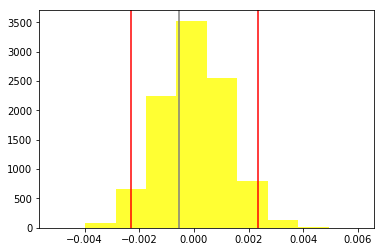

In [32]:
plt.hist(p_diffs, alpha = 0.8, color='yellow')
plt.axvline(lower, color='red')
plt.axvline(upper, color='red')
plt.axvline(obs_diff, color='grey');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
# find P-value
(p_diffs > obs_diff).mean()

0.6747

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Summary from Hypothesis testing** <br>
- P-value is larger than alpha of 0.05 therefore fail to reject the null hypothesis
- There are no evidence indicate the more conversion rate on the new page than the old page
- It means that no need to change to the new page or it would be great if Audacity keep using the old page

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
# calculate conversion rate for each page type
# no. of individuals who received each page
import statsmodels.api as sm

convert_old = df2.query('group == "control"').converted.sum()
convert_new = df2.query('group == "treatment"').converted.sum()
n_old = len(df2.query('group == "control"'))
n_new = len(df2.query('group == "treatment"'))

In [35]:
# check if data accurate 
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [36]:
# test z-score and check p-value
from scipy.stats import norm

z_score, p_value = sm.stats.proportions_ztest( [convert_new, convert_old], [n_new, n_old], alternative='larger' )
    
print('z_score = ' + str(z_score))
print('p_value = ' + str(p_value))
print('significant value: ' + str(norm.cdf(z_score)))
print('critical value at 95% confidence interval: ' +str(norm.ppf(1-(0.05))))

z_score = -1.3109241984234394
p_value = 0.9050583127590245
significant value: 0.09494168724097551
critical value at 95% confidence interval: 1.6448536269514722


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Summary form Hypothesis testing** <br>
- z-score of 1.311 is less than the critical value of 1.645 
- p-value of 0.9051 much more than alpha of 0.05
- therefore fail to reject the null hypothesis
- the figures proof the agree of j. and k.
- Audacity no need to change to use the new page officialy due to it doesn't help the yield in conversion rate

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistics regression**<br>predict binary class: yes or no (decision making in change webpage)

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
# add intercept and dummy variables
df2['intercept'] = 1
df2[['control', 'treatment']] = pd.get_dummies(df['group'])

In [38]:
# check data set
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [39]:
# create and fit Logistic regression function, use control group the baseline
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'treatment']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 02 Jun 2019   Pseudo R-squ.:               8.077e-06
Time:                        19:01:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [41]:
# take exponential in order to interpret the meaning
np.exp(-1.9888)

0.13685955841614492

In [42]:
# for negative values comparing easier to explain as 1/np.exp()
1/np.exp(-1.9888), 1/np.exp(-0.0150)

(7.3067603868728614, 1.015113064615719)

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Hypothesis** <br>
$H_0: p_{new} - p_{old} = 0 \\
H_1: p_{new} - p_{old} \neq 0 $  <br>
- p-value of 0.1900 more than alpha of 0.05, treatment is statistically non-significant
- therefore fail to reject the null hypothesis
- changing to new page in treatment group in reality make it worser or equal to old page in control group
- for each less one person click through ab_page, conversion rate is 1.015 times as likely holding all else constant
- hypothesis in logistics model focus on the probability of convert rate predicted by experimental group
- so it will be 2-sided test differs from PartII that focus on prooving the convert rate in new page better than the old one

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Other factors**
- should include other factors in logistic model too (but have to plan strictly what variables should be included)
- this is time series data (can be told from timestamp) so it will be perfect if insert trend, seasonal effect to the model
- maybe age of students can be useful assume that older students work along the couse in another way younger can only study
- some of characteristic variables can be considered such things like "education" "jobs" "current address" etc.
- disadvantage can happen for example, multicolinearlity problem when explanatory variables associated within theirselves
- or they can make heteroscedasticity of error variance becasue the model can't describe dependent variable at theshold value
- sometimes more variables generate more issues and it doesn't help forecast anything
- lastly, it may take lot of money to keep unnessesory data from observers but actually data team <br>
in the coperate have to deal with PCA reducing data set dimension

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [43]:
# open and join countries to df2
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [44]:
# check data frame
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [45]:
# group by country to see no. of users from each country
df_new.groupby('country').group.count()

country
CA     14499
UK     72466
US    203619
Name: group, dtype: int64

In [46]:
# Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])[['CA', 'UK', 'US']]
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [47]:
# Fit Linear Model And Obtain the Resultsc (baseline = 'CA', 'control')
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'treatment', 'UK', 'US']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 02 Jun 2019   Pseudo R-squ.:               2.323e-05
Time:                        19:01:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
treatment     -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [48]:
# exponenciate coefficients for easier translation
np.exp(0.0506), np.exp(0.0408)

(1.0519020483004984, 1.0416437559600236)

In [49]:
# take 1 divided exponenciate minus value coefficient for easier translation
1/np.exp(-0.0149)

1.0150115583846535

**summary from Logistic regression**
- p-value show non-significant for all predictor variables
- therefore, again can't reject null hypothesis
- compare to people who lived in Canada, UK and US people have more convert rate only at 0.04-0.05 times
- no Simpson's paradox in the hypothesis since there's no significant difference between either group or countries of the users

In [50]:
# model fitting process
# import confusion_matrix, precision_score, recall_score, accuracy_score

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
np.random.seed(42)

df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [51]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0


In [52]:
# define X: explanatory variables, y:dependent variable
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])[['CA', 'UK', 'US']]
X = df_new.drop(['group', 'country', 'landing_page', 'timestamp', 'CA'] , axis=1)
y = df_new['converted']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=0)

In [53]:
# model fitted
log_mod = LogisticRegression()
log_mod.fit(X_train, y_train)
y_preds = log_mod.predict(X_test)

C:\Users\Yongsvw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
# create confusion matrix
confusion_matrix(y_test, y_preds)

array([[51804,     0],
       [    0,  7092]], dtype=int64)

In [55]:
# all rate are 1.0 , country doesn't help to predict converted
precision_score(y_test, y_preds), recall_score(y_test, y_preds), accuracy_score(y_test, y_preds)

(1.0, 1.0, 1.0)

<a id='conclusions'></a>
## Conclusions

No matter using A/B test by bootsampling approach or Regression approach, we found the statistical evidence <br>
support by hypothesis testing that old page was slightly better than the new page in conversion result. <br>
None of the variables are significant so all are fail to reject the null hypothesis. <br>
Therefore, suggest keep running page by the old version rather than change to the new version but not increase convert rate.